In [1]:
import netket as nk
import json
import matplotlib.pyplot as plt
from time import time
from pathlib import Path
from Models import FeedForwardNeuralNetwork

In [2]:
res_path = Path('./Simulations/5-ModelComparison')
L = 18
alpha_list = [(0.3,), (1,), (2,), (1, 1), (1, 2, 1)]
Sz = 0
lr = 0.01
ds = 0.1
n_iter = 500
n_samples = 800
ffnn_results = []
times = []

In [3]:
chain = nk.graph.Hypercube(length=L, n_dim=1, pbc=True)
hilbert = nk.hilbert.Spin(s=1/2, total_sz=Sz, N=chain.n_nodes)
hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=chain, J=1)
eval_gs = nk.exact.lanczos_ed(hamiltonian, k=1, compute_eigenvectors=False)[0]
eval_gs

-32.09099634813501

Comparing different Feed Forward Neural Networks

In [4]:
for alpha in alpha_list:
    chain = nk.graph.Hypercube(length=L, n_dim=1, pbc=True)
    hilbert = nk.hilbert.Spin(s=1/2, total_sz=Sz, N=chain.n_nodes)
    hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=chain, J=1)
    sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=chain)
    optimizer = nk.optimizer.Sgd(learning_rate=lr)
    sr = nk.optimizer.SR(diag_shift=ds)
    ffnn = FeedForwardNeuralNetwork(layer_alpha=alpha)
    vstate = nk.vqs.MCState(sampler, ffnn, n_samples=n_samples)
    gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, 
                preconditioner=sr, variational_state=vstate)
    
    start = time()
    gs.run(n_iter=n_iter, out=(chain_path := f'{res_path}/HeisenbergChain/ffnnN{chain.n_nodes}'
                              f'alpha{list(alpha)}{"Sz0" if Sz == 0 else ""}lr{lr}niter{n_iter}'))
    print(f'Time: {(t := time()-start):.3f} seconds')
    ffnn_results.append(json.load(open(f'{chain_path}.log')))
    times.append(t)

  0%|          | 0/500 [00:00<?, ?it/s]

Time: 14.117 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

Time: 21.240 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

Time: 34.156 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

Time: 27.127 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

Time: 57.158 seconds


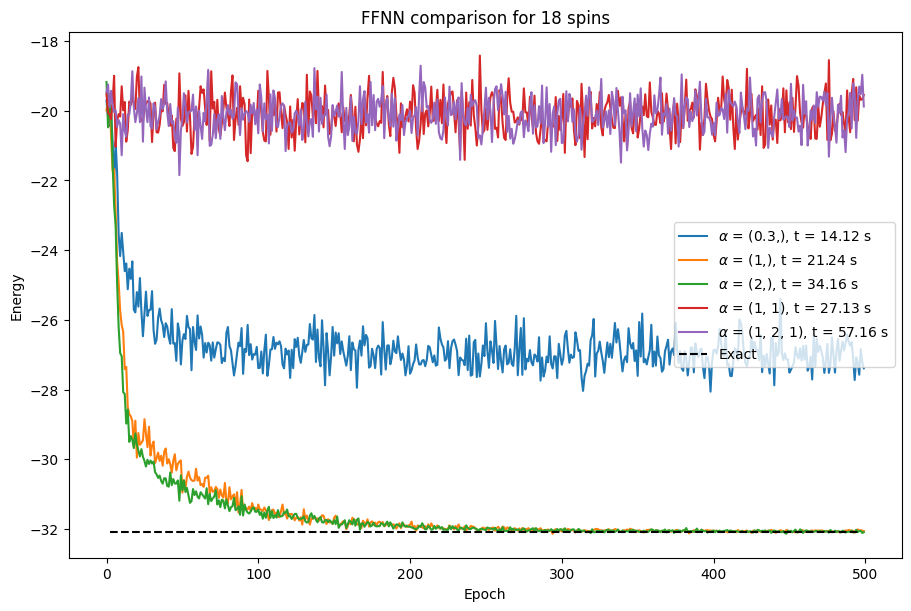

In [5]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(9, 6))
for ffnn_res, alpha, t in zip(ffnn_results, alpha_list, times):
    axes.plot(ffnn_res['Energy']['iters'], ffnn_res['Energy']['Mean'], 
              label=f'$\\alpha$ = {alpha}, t = {t:.2f} s')
axes.axhline(y=eval_gs, xmin=0.05, xmax=0.95, color='black', linestyle='--', label='Exact')
axes.set(xlabel='Epoch', ylabel='Energy', 
         title=f'FFNN comparison for {L} spins')
axes.legend();

Testing again for 50 spins and 1000 epochs

In [10]:
ffnn_results = []
times = []
L = 50
n_iter = 1000

In [11]:
for alpha in alpha_list:
    chain = nk.graph.Hypercube(length=L, n_dim=1, pbc=True)
    hilbert = nk.hilbert.Spin(s=1/2, total_sz=Sz, N=chain.n_nodes)
    hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=chain, J=1)
    sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=chain)
    optimizer = nk.optimizer.Sgd(learning_rate=lr)
    sr = nk.optimizer.SR(diag_shift=ds)
    ffnn = FeedForwardNeuralNetwork(layer_alpha=alpha)
    vstate = nk.vqs.MCState(sampler, ffnn, n_samples=n_samples)
    gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, 
                preconditioner=sr, variational_state=vstate)
    
    start = time()
    gs.run(n_iter=n_iter, out=(chain_path := f'{res_path}/HeisenbergChain/ffnnN{chain.n_nodes}'
                              f'alpha{list(alpha)}{"Sz0" if Sz == 0 else ""}lr{lr}niter{n_iter}'))
    print(f'Time: {(t := time()-start):.3f} seconds')
    ffnn_results.append(json.load(open(f'{chain_path}.log')))
    times.append(t)

  0%|          | 0/1000 [00:00<?, ?it/s]

Time: 89.909 seconds


  0%|          | 0/1000 [00:00<?, ?it/s]

Time: 215.881 seconds


  0%|          | 0/1000 [00:00<?, ?it/s]

Time: 392.951 seconds


  0%|          | 0/1000 [00:00<?, ?it/s]

Time: 376.954 seconds


  0%|          | 0/1000 [00:00<?, ?it/s]

Time: 823.293 seconds


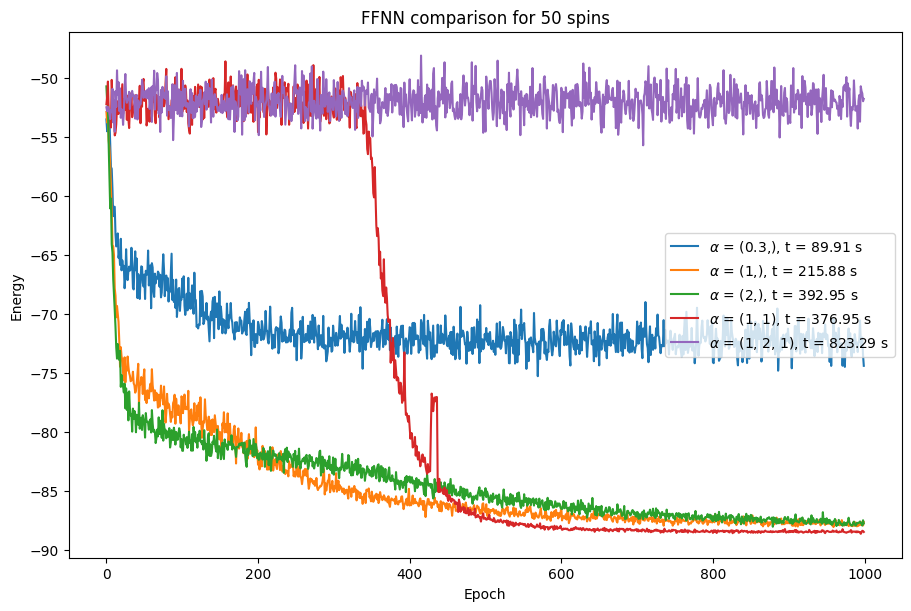

In [13]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(9, 6))
for ffnn_res, alpha, t in zip(ffnn_results, alpha_list, times):
    axes.plot(ffnn_res['Energy']['iters'], ffnn_res['Energy']['Mean'], 
              label=f'$\\alpha$ = {alpha}, t = {t:.2f} s')
axes.set(xlabel='Epoch', ylabel='Energy', 
         title=f'FFNN comparison for {L} spins')
axes.legend();